# Predicting Readmission within 30 for Diabetic Paitents
## Team Charlie - Data Mining Course -5831 (Final Project)
Team members- Tagore Kosireddy, Michael Ngala, Mihret Kemal, Feven Tefera,  

This project involves prediction of readmission risk among diabetic patients within 30 days post-hospital discharge, with the objective of improving patient outcomes and optimizing healthcare resource allocation.

Summary of the project
- Used Diabetes 130-Hospitals Dataset from fairlearn
- Essential data preprocessing and analysis is done
- Various machine learning algorithms are applied namely: logistic regression, decision trees, random forests, XGBoost and CATBoost
- Performance evaluation metrics applied are precision, recall, F1-score, and AUC Score.

### Data
130-Hospitals Dataset from fairlearn, you can see the csv file [here](https://raw.githubusercontent.com/fairlearn/talks/main/2021_scipy_tutorial/data/diabetic_preprocessed.csv)

In [1]:
## import the required libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import statistics
import textwrap
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
%matplotlib inline

In [2]:
# getting the real data from the fair_learn website 
df = pd.read_csv("https://raw.githubusercontent.com/fairlearn/talks/main/2021_scipy_tutorial/data/diabetic_preprocessed.csv")
df

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary,readmit_30_days
0,Caucasian,Female,30 years or younger,Other,Referral,1,Other,41,0,1,...,No,No,False,False,False,False,False,NO,0,0
1,Caucasian,Female,30 years or younger,Discharged to Home,Emergency,3,Missing,59,0,18,...,Ch,Yes,False,False,False,False,False,>30,1,0
2,AfricanAmerican,Female,30 years or younger,Discharged to Home,Emergency,2,Missing,11,5,13,...,No,Yes,False,False,False,True,True,NO,0,0
3,Caucasian,Male,30-60 years,Discharged to Home,Emergency,2,Missing,44,1,16,...,Ch,Yes,False,False,False,False,False,NO,0,0
4,Caucasian,Male,30-60 years,Discharged to Home,Emergency,1,Missing,51,0,8,...,Ch,Yes,False,False,False,False,False,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Over 60 years,Other,Emergency,3,Missing,51,0,16,...,Ch,Yes,True,False,False,False,False,>30,1,0
101762,AfricanAmerican,Female,Over 60 years,Other,Other,5,Missing,33,3,18,...,No,Yes,True,False,False,True,False,NO,0,0
101763,Caucasian,Male,Over 60 years,Discharged to Home,Emergency,1,Missing,53,0,9,...,Ch,Yes,True,False,False,False,True,NO,0,0
101764,Caucasian,Female,Over 60 years,Other,Emergency,10,Other,45,2,21,...,Ch,Yes,True,False,False,True,False,NO,0,0


In [3]:
# Print the features (columns) of the dataset
print("Features of the dataset:")
print(df.columns.tolist())

# Print the target variable
target_variable = 'readmitted'
print("\nTarget variable:")
print(target_variable)


Features of the dataset:
['race', 'gender', 'age', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'primary_diagnosis', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 'diabetesMed', 'medicare', 'medicaid', 'had_emergency', 'had_inpatient_days', 'had_outpatient_days', 'readmitted', 'readmit_binary', 'readmit_30_days']

Target variable:
readmitted


In [4]:
# The frequency of the target variable unique values 
df['readmit_30_days'].value_counts()

readmit_30_days
0    90409
1    11357
Name: count, dtype: int64

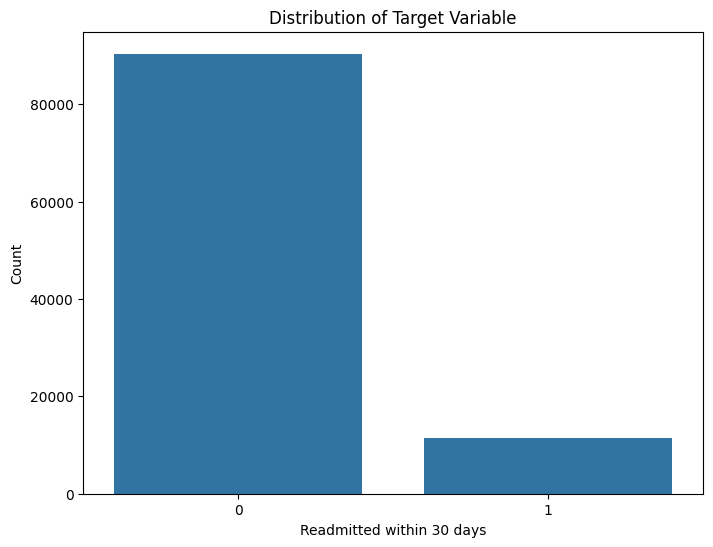

In [5]:
# Filter the DataFrame to include only categories with values 0 and 1 for the target variable
filtered_df = df[df['readmit_30_days'].isin([0, 1])]

# Plot the distribution of the filtered target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='readmit_30_days', data=filtered_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Count')
plt.show()


Number of missing values in every column:
race                            0
gender                          0
age                             0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
primary_diagnosis               0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
insulin                         0
change                          0
diabetesMed                     0
medicare                        0
medicaid                        0
had_emergency                   0
had_inpatient_days              0
had_outpatient_days             0
readmitted                      0
readmit_binary                  0
readmit_30_days                 0
dtype: int64


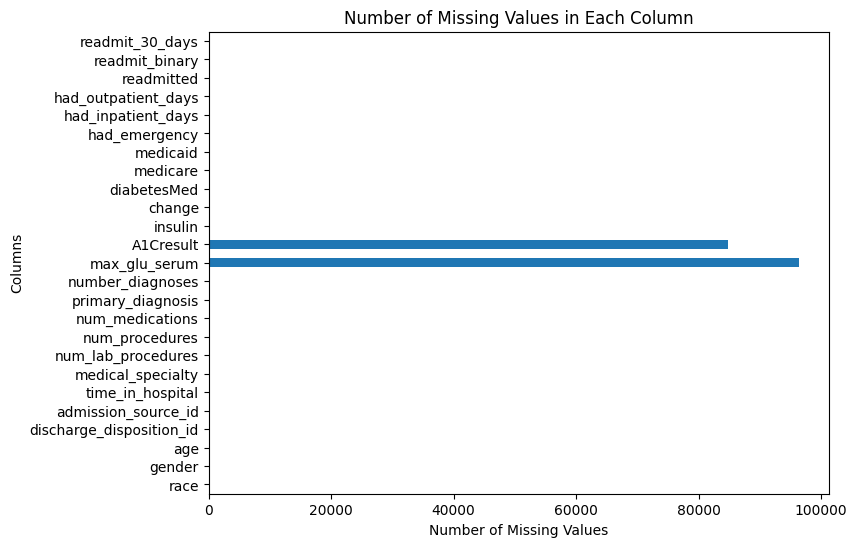

In [6]:

# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the number of missing values in every column
print("Number of missing values in every column:")
print(missing_values_count)

# Visualize the missing values
plt.figure(figsize=(8, 6))
missing_values_count.plot(kind='barh')  # Changed kind to 'barh' for horizontal bar plot
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()


In [7]:
# dropping the two columns which has high missing values 
columns_to_drop = ['max_glu_serum', 'A1Cresult']

# Dropping the specified columns with error handling
df = df.drop(columns=columns_to_drop, errors='ignore')
df

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary,readmit_30_days
0,Caucasian,Female,30 years or younger,Other,Referral,1,Other,41,0,1,...,No,No,False,False,False,False,False,NO,0,0
1,Caucasian,Female,30 years or younger,Discharged to Home,Emergency,3,Missing,59,0,18,...,Ch,Yes,False,False,False,False,False,>30,1,0
2,AfricanAmerican,Female,30 years or younger,Discharged to Home,Emergency,2,Missing,11,5,13,...,No,Yes,False,False,False,True,True,NO,0,0
3,Caucasian,Male,30-60 years,Discharged to Home,Emergency,2,Missing,44,1,16,...,Ch,Yes,False,False,False,False,False,NO,0,0
4,Caucasian,Male,30-60 years,Discharged to Home,Emergency,1,Missing,51,0,8,...,Ch,Yes,False,False,False,False,False,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Over 60 years,Other,Emergency,3,Missing,51,0,16,...,Ch,Yes,True,False,False,False,False,>30,1,0
101762,AfricanAmerican,Female,Over 60 years,Other,Other,5,Missing,33,3,18,...,No,Yes,True,False,False,True,False,NO,0,0
101763,Caucasian,Male,Over 60 years,Discharged to Home,Emergency,1,Missing,53,0,9,...,Ch,Yes,True,False,False,False,True,NO,0,0
101764,Caucasian,Female,Over 60 years,Other,Emergency,10,Other,45,2,21,...,Ch,Yes,True,False,False,True,False,NO,0,0


In [8]:
# Remove rows where gender is 'Unknown/Invalid'
df = df.query("gender != 'Unknown/Invalid'")

# Remove rows where race is 'Unknown', 'Other', or 'Asian'
df = df.query("race not in ['Unknown', 'Other','Asian']")


In [9]:

# Replace 'Other' values in specific columns with more descriptive labels
df['admission_source_id'] = df['admission_source_id'].replace('Other', 'other_admission_source_id')
df['medical_specialty'] = df['medical_specialty'].replace('Other', 'other_medical_specialty')
df['primary_diagnosis'] = df['primary_diagnosis'].replace('Other', 'other_primary_diagnosis')
df['insulin'] = df['insulin'].replace('No', 'No_insulin')
df['readmitted'] = df['readmitted'].replace('NO', 'NO_readmitted')

In [10]:

# Convert categorical variables into one-hot encoded columns
df = pd.get_dummies(df, columns=["race","gender","age","discharge_disposition_id","admission_source_id","medical_specialty","primary_diagnosis","insulin","change","readmitted"]
, prefix='channel')

# Convert 'diabetesMed' column values from 'Yes'/'No' to True/False
df['diabetesMed'] = df['diabetesMed'].replace({'Yes': True, 'No': False})

# List of columns to convert from True/False to 0/1
columns_to_convert = [
    "diabetesMed", "medicare", "medicaid", "had_emergency", "had_inpatient_days", "had_outpatient_days",
    "channel_AfricanAmerican", "channel_Caucasian", "channel_Hispanic",
    "channel_Female", "channel_Male", "channel_30 years or younger", "channel_30-60 years", "channel_Over 60 years",
    "channel_Discharged to Home", "channel_Other", "channel_Emergency", "channel_Referral", "channel_other_admission_source_id",
    "channel_Cardiology", "channel_Emergency/Trauma", "channel_Family/GeneralPractice", "channel_InternalMedicine",
    "channel_Missing", "channel_other_medical_specialty",
    "channel_Diabetes", "channel_Genitourinary Issues", "channel_Musculoskeletal Issues", "channel_Respiratory Issues",
    "channel_other_primary_diagnosis", "channel_Down", "channel_No_insulin", "channel_Steady", "channel_Up", "channel_Ch",
    "channel_No", "channel_<30", "channel_>30", "channel_NO_readmitted"
]

# Convert True/False to 0/1 for the specified columns
for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Columns to drop from the dataframe the target varibales 
columns_to_drop = ['channel_<30', 'channel_>30', 'channel_NO_readmitted','readmit_binary']
df = df.drop(columns=columns_to_drop)

# df.head()
df.shape

/tmp/ipykernel_2868860/2772765718.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].replace({'Yes': True, 'No': False})


(97346, 42)

In [11]:
print(df.columns.tolist())

['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses', 'diabetesMed', 'medicare', 'medicaid', 'had_emergency', 'had_inpatient_days', 'had_outpatient_days', 'readmit_30_days', 'channel_AfricanAmerican', 'channel_Caucasian', 'channel_Hispanic', 'channel_Female', 'channel_Male', 'channel_30 years or younger', 'channel_30-60 years', 'channel_Over 60 years', 'channel_Discharged to Home', 'channel_Other', 'channel_Emergency', 'channel_Referral', 'channel_other_admission_source_id', 'channel_Cardiology', 'channel_Emergency/Trauma', 'channel_Family/GeneralPractice', 'channel_InternalMedicine', 'channel_Missing', 'channel_other_medical_specialty', 'channel_Diabetes', 'channel_Genitourinary Issues', 'channel_Musculoskeletal Issues', 'channel_Respiratory Issues', 'channel_other_primary_diagnosis', 'channel_Down', 'channel_No_insulin', 'channel_Steady', 'channel_Up', 'channel_Ch', 'channel_No']


In [12]:
# make new data to perform the SMOTE on the target variable
dfY = df['readmit_30_days']

columns_to_exclude = ['readmit_30_days']
dfX = df.drop(columns=columns_to_exclude)

In [13]:


# Split the data into features and target
X = dfX
y = dfY

# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution before oversampling:", Counter(y))
print("Class distribution after oversampling:", Counter(y_resampled))


# Split data into training + validation set and testing set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Further split training + validation set into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42)

Class distribution before oversampling: Counter({0: 86387, 1: 10959})
Class distribution after oversampling: Counter({0: 86387, 1: 86387})


In [14]:
# random seed for reproducibility
RANDOM_SEED = 42

In [15]:
# classifiers and parameter grids
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, solver='liblinear', random_state=RANDOM_SEED)),
    ('Decision Tree', DecisionTreeClassifier(random_state=RANDOM_SEED)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_SEED)),
    ('XGBoost', XGBClassifier(random_state=RANDOM_SEED)),
    ('CatBoost', CatBoostClassifier(silent=True, random_state=RANDOM_SEED))
]

param_grids = [
    {
        'classifier': [LogisticRegression(max_iter=1000, solver='liblinear', random_state=RANDOM_SEED)],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__class_weight': ['balanced', None]
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=RANDOM_SEED)],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier': [RandomForestClassifier(random_state=RANDOM_SEED)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    {
        'classifier': [XGBClassifier(random_state=RANDOM_SEED)],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__min_child_weight': [1, 3, 5]
    },
    {
        'classifier': [CatBoostClassifier(silent=True, random_state=RANDOM_SEED)],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__n_estimators': [50, 100, 200]
    }
]

In [16]:
# pipeline and perform grid search with F1 score
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', None)
])


# dictionary to store metrics
metrics_dict = {'Model': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC Score': [], 'Best Parameters': []}


grid_searches = []
for i, (name, classifier) in enumerate(classifiers):
    print(f"Training {name}...")
    pipeline.set_params(classifier=classifier)
    grid_search = GridSearchCV(pipeline, param_grids[i], cv=StratifiedKFold(n_splits=5, shuffle = True, random_state=RANDOM_SEED), scoring='f1')
    grid_search.fit(X_train, y_train)
    grid_searches.append(grid_search)
    print(f"Best {name} parameters: {grid_search.best_params_}")
    print(f"Best {name} cross-validation F1 score: {grid_search.best_score_}\n")
    
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    metrics_dict['Model'].append(name)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['ROC AUC Score'].append(roc_auc)
    metrics_dict['Best Parameters'].append(grid_search.best_params_)

Training Logistic Regression...
Best Logistic Regression parameters: {'classifier': LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'), 'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}
Best Logistic Regression cross-validation F1 score: 0.919118246241073

Training Decision Tree...
Best Decision Tree parameters: {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best Decision Tree cross-validation F1 score: 0.8825976864084829

Training Random Forest...
Best Random Forest parameters: {'classifier': RandomForestClassifier(random_state=42), 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Random Forest cross-validation F1 score: 0.9281214427046012

Training XGBoost...
Best XGBoost parameters: {'classifier': XGBClassifier(base_score=No

In [22]:
#  Train best model on entire training + validation set and evaluate on test set
best_grid_search = max(grid_searches, key=lambda x: x.best_score_)
best_model = best_grid_search.best_estimator_
best_model_name = [name for name, _ in classifiers if best_model == best_grid_search.best_estimator_][0]
best_model.fit(X_trainval, y_trainval)

y_pred = best_model.predict(X_test)
print(f"Best Model Evaluation on Test Set:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Best Model Evaluation on Test Set:
Confusion Matrix:
 [[17170   108]
 [ 2077 15200]]
Accuracy: 0.9367674721458544
Precision: 0.9929448654298406
Recall: 0.8797823696243561
F1 Score: 0.9329446064139941


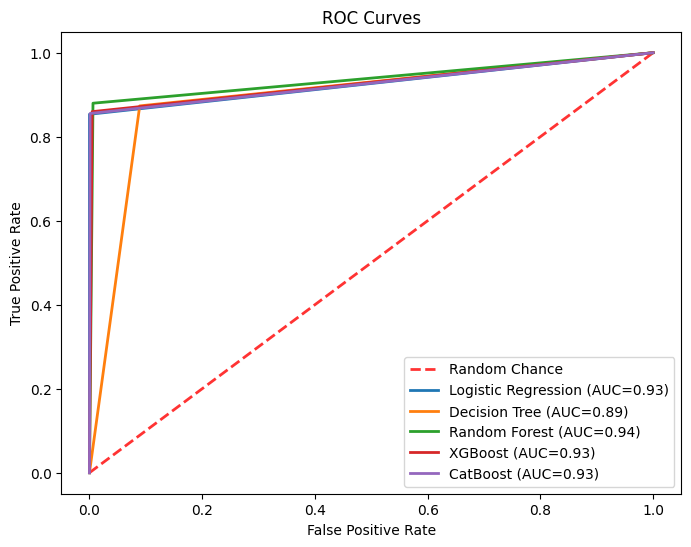

In [18]:
# Plot ROC curves for all models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost']
models = [best_grid_search.best_estimator_ for best_grid_search in grid_searches]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Chance', alpha=0.8)
for model, name in zip(models, model_names):
    y_proba = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC={roc_auc:.2f})')

ax.set_title('ROC Curves')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
ax.legend(loc='lower right')
plt.show()

Plotting confusion matrix for Logistic Regression...


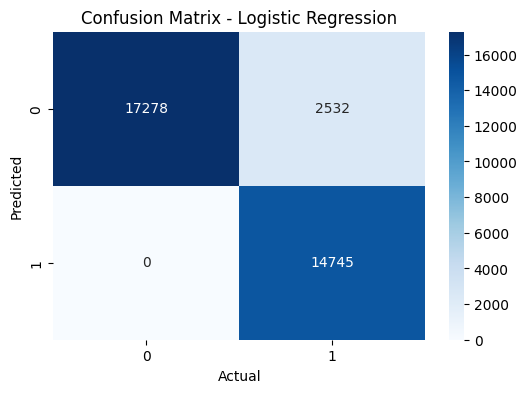

Plotting confusion matrix for Decision Tree...


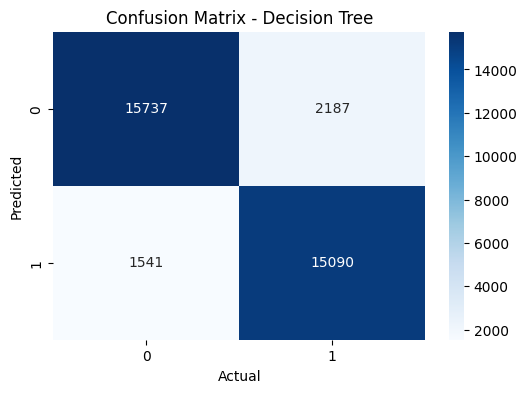

Plotting confusion matrix for Random Forest...


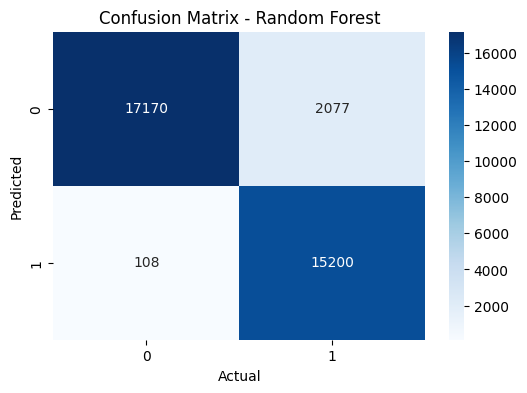

Plotting confusion matrix for XGBoost...


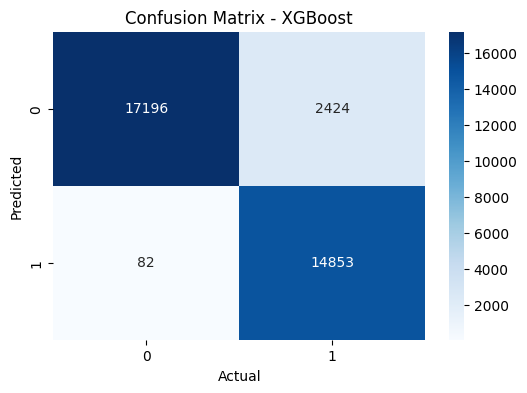

Plotting confusion matrix for CatBoost...


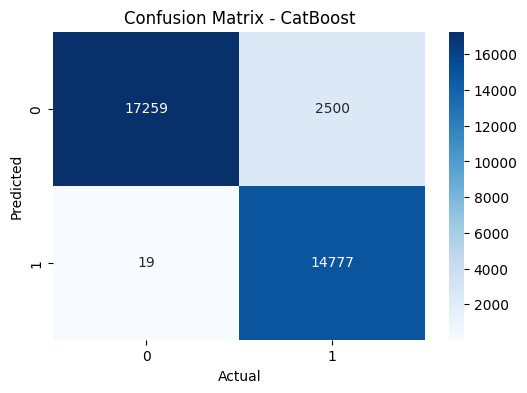

In [19]:
# Plot confusion matrices for all models
for i, (name, _) in enumerate(classifiers):
    print(f"Plotting confusion matrix for {name}...")
    cm = confusion_matrix(y_test, grid_searches[i].best_estimator_.predict(X_test))
    cm = cm.T

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

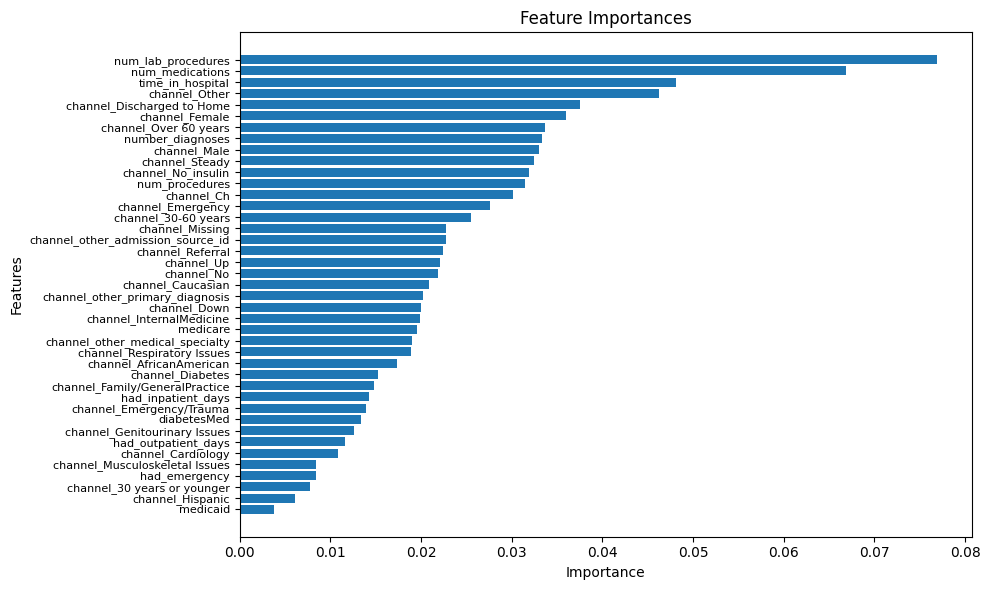

In [20]:
# feature importances for the Random Forest model
rf_model = [model for name, model in classifiers if name == 'Random Forest'][0]
rf_model.fit(X_trainval, y_trainval)
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), sorted_importances, tick_label=feature_names[sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.yticks(np.arange(len(feature_importances)), feature_names[sorted_indices], fontsize=8)
plt.tight_layout()
plt.show()

In [21]:
# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame
print("\nEvaluation Metrics for All Models:")
metrics_df


Evaluation Metrics for All Models:


,Model,Precision,Recall,F1 Score,ROC AUC Score,Best Parameters
0,Logistic Regression,1.000000,0.853447,0.920929,0.926723,{'classifier': LogisticRegression(max_iter=100...
1,Decision Tree,0.907342,0.873416,0.890055,0.892113,{'classifier': DecisionTreeClassifier(random_s...
2,Random Forest,0.991164,0.876541,0.930335,0.934364,{'classifier': RandomForestClassifier(random_s...
3,XGBoost,0.994510,0.859698,0.922203,0.927476,"{'classifier': XGBClassifier(base_score=None, ..."
4,CatBoost,0.998716,0.855299,0.921460,0.927100,{'classifier': <catboost.core.CatBoostClassifi...
